Imports of libraries available in python

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from cmath import pi
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

Import of a library written for calculations with bulk topological proximity effect

In [4]:
import BTPE_mhex as BTPE

Initialize the model

In [5]:
PS = BTPE.PhysicalSystem(3)         # Three layers
PS.update_all_layers(4.,0.,0.,1.)   # Initialize all layers to graphene model
PS.update_all_couplings(0.)         # All couplings uniform
PS.update_layer(0,4.,1.,pi/2.,0.)   # Layer with index 0 represents Haldane model
PS.reset_kSpace(48,48)              # Set a grid in kSpace to 48x48
print(PS)                           # Print summary of the model

This system has 3 layers.
The parameters for the each layers are:
Layer no. 0:	 4.0<-->t1, 	1.0<-->t2, 	1.5707963267948966<-->phi, 	0.0<-->m, 	0.0<-->t31, 	0.0<-->t32, 
Coupled to the next layer with strength:	0.0
Layer no. 1:	 4.0<-->t1, 	0.0<-->t2, 	0.0<-->phi, 	1.0<-->m, 	0.0<-->t31, 	0.0<-->t32, 
Coupled to the next layer with strength:	0.0
Layer no. 2:	 4.0<-->t1, 	0.0<-->t2, 	0.0<-->phi, 	1.0<-->m, 	0.0<-->t31, 	0.0<-->t32, 



Prepare grid for couplings strengths

In [15]:
gridCPL=np.linspace(0.,3.,101)     # Grid of coupling strengths

Prepare matrices for storing the results

In [22]:
ChN = np.zeros(gridCPL.shape[0])           # Storage of Chern numbers
TIIL= np.zeros((gridCPL.shape[0],PS.NL))   # Stogare of topological invariatnts of individual layers
TIS = np.zeros(gridCPL.shape[0])           # Storage of topological invariant of subsystem with NL-1 layers
EL  = 0                                    # Index of excluded layer for TIS
DGp = np.zeros(gridCPL.shape[0])           # Storage of direct gap

Generating results

In [25]:
for i,cpl in enumerate(gridCPL):
    print('Calculating results for coupling: {0:2.3f}'.format(cpl),end="\r")
    PS.update_all_couplings(cpl)
    PS.init_eigdata(EL)
    ChN[i],BCtemp = PS.method1()
    TIIL[i] = PS.method2()
    TIS[i] = PS.method3()
    DGp[i],kv = PS.find_direct_gap(5)

Plot the results
Note that with the onset of semimetal above ~2.8 the calculation of topological indices is ill defined as the gap is closed.
Hence, the values may seem noisy.

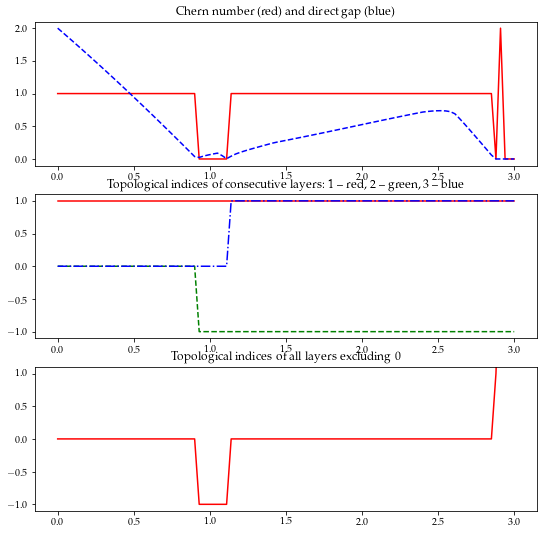

In [35]:
plt.figure(figsize=(9,9))
plt.subplot(3,1,1)
plt.plot(gridCPL,ChN,'r-',gridCPL,DGp,'b--')
plt.title("Chern number (red) and direct gap (blue)")
plt.subplot(3,1,2)
plt.plot(gridCPL,TIIL[:,0],'r-',gridCPL,TIIL[:,1],'g--',gridCPL,TIIL[:,2],'b-.')
plt.title("Topological indices of consecutive layers: 1 -- red, 2 -- green, 3 -- blue ")
plt.subplot(3,1,3)
plt.plot(gridCPL,TIS,'r-')
plt.ylim(-1.1,1.1)
plt.title('Topological indices of all layers excluding {0}'.format(EL))
plt.show()

Now we give an example of plotting discretized Berry curvature from Fukui's method
First prepare data and grids

In [62]:
PS.update_all_couplings(0.4)
PS.init_eigdata(EL)
ChNtemp,BCtemp = PS.method1()
xgrid=np.zeros(BCtemp.shape)
ygrid=np.zeros(BCtemp.shape)
for i in range(xgrid.shape[0]):
    xgrid[i,:]=np.linspace(PS.kS.kx0,PS.kS.kxmax,xgrid.shape[1])
for i in range(ygrid.shape[1]):
    ygrid[:,i]=np.linspace(PS.kS.ky0,PS.kS.kymax,ygrid.shape[0])
data={'a' : xgrid,
      'b' : ygrid,
      'c' : BCtemp.real}

Now plot the Berry curvature

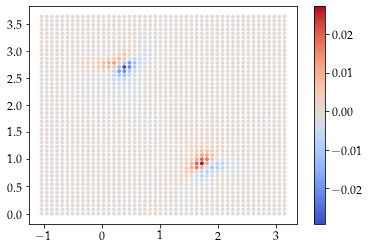

In [63]:
plt.scatter('a','b',c='c', s=8. ,data=data,cmap='coolwarm')
#plt.tight_layout()
plt.rc('font', size=12)
#plt.axis([0.,2.,-15,15])
#plt.ylabel('$E$',fontsize=20)
#plt.xlabel('$k_x/\pi$',fontsize=20)
clb=plt.colorbar()
#clb.set_label(r"$ \langle y \rangle $",fontsize=20)
#plt.show()
#plt.gcf().subplots_adjust(bottom=0.15)
#plt.savefig('results2/NL3_HL0_t1_4.00__t2H_1.00__mN_1.00/Haldane.png',dpi=300, transparent=True)
plt.show()